In [48]:

#LIBRARIES
import pandas as pd
import numpy as np
import quandl
from dotenv import load_dotenv
import os
import datetime

#ML LIBRARIES
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#PLOTING LIBRARIES
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [119]:
# GETS THE API KEY FROM .ENV FILE
def get_key(d_key):
    load_dotenv('.env')
    key = os.environ.get(d_key)
    return key

# GETS DATA FROM QUANDL / DEFAULT IS BOING DATA 
def quandl_get(code="EOD/BA", start_date="1970-01-01", end_date="2019-05-27"):
    return quandl.get(code, start_date=start_date, end_date=end_date)

# KEEP SIGNIFICANT COLUMNS. ADD CHANGE AND VOLATILITY
def feature_eng(df, n=10):
    
    df['Volatility'] = (df['Adj_High'] - df['Adj_Low']) / df['Adj_Low']
    df['Change'] = (df['Adj_Close'] - df['Adj_Open']) / df['Adj_Open']
    df = df[['Adj_Close', 'Volatility', 'Change', 'Adj_Volume']]
    
    #Defines forecast to predict
    forecast_column = 'Adj_Close'
    df.fillna('-999999', inplace=True) # N/A value treated as outlier
    
    #shifts label to the past n days
    df['future_price{}d'.format(n)] = df[forecast_column].shift(-n)
    return df
    
    
#PLOTS CORRELATION HEATMAP AND SAVES
def plot_corr(df,size=10, title = 'Correlation'):
    style.use('ggplot')
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax = sns.heatmap(corr, annot=True, cmap="Blues").set_title(title)
    fig.savefig('images/corr_heatmap.png')

#TRAIN LINEAR REGRESSION 
def LR_train(data):
    df = data.dropna()
    X = df.drop('future_price10d', axis=1)
    y = df['future_price10d']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    reg = LinearRegression(n_jobs=-1)
    reg.fit(X_train, y_train)
    return reg.score(X_test, y_test), reg

#PREDICT FUTURE VALUES
def LR_predict(df, reg ,n=10):
    X = df.drop('future_price10d', axis=1)
    X_predict = X[-n:]
    return reg.predict(X_predict)

#PLOT STOCK PRICE VS TIME
def plot_stock(df, col, size=10, title='Stock'):
    style.use('ggplot')
    df[['Adj_Close']].plot(cmap="Blues_r", figsize=(size,size)).set_title(title)
    
    
#!!!! train lstm model !!!!

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


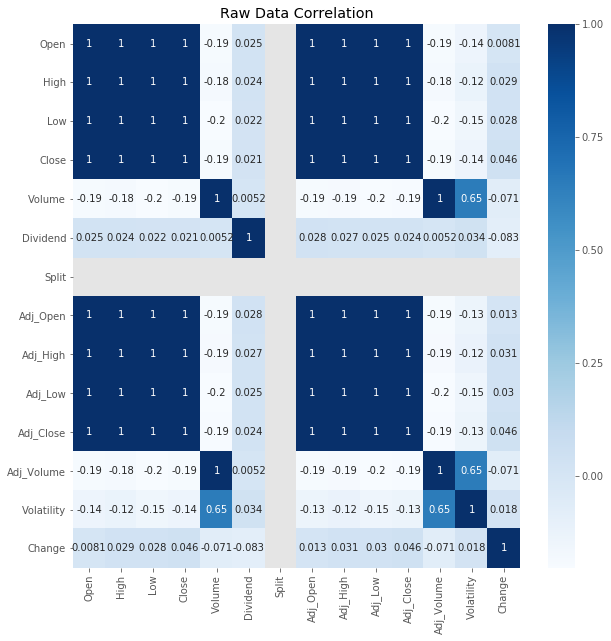

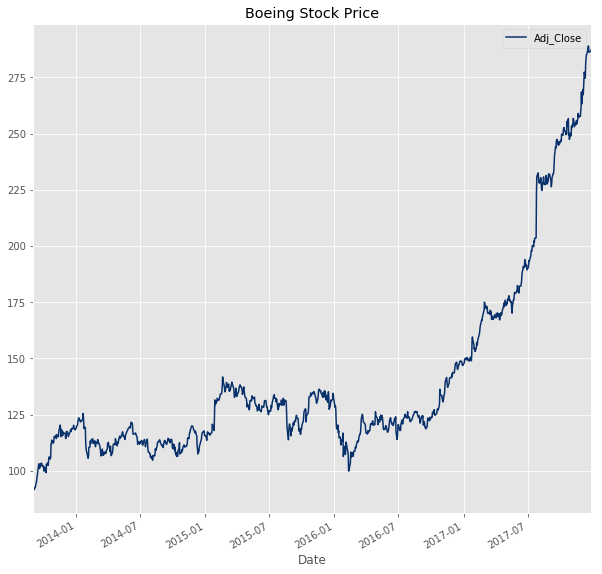

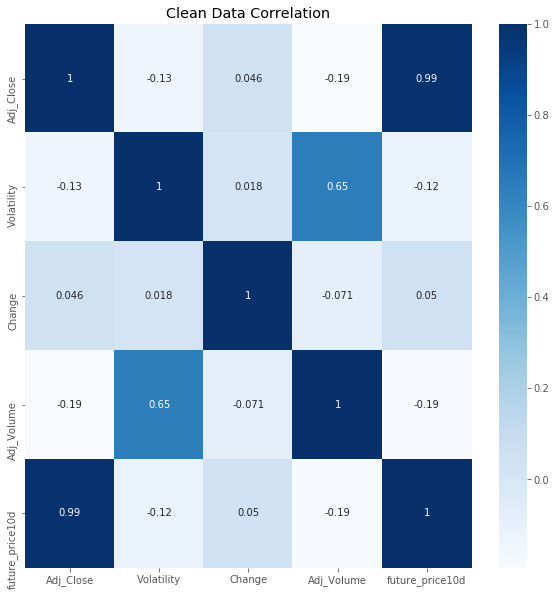

In [120]:
if __name__ == "__main__":
    days_predict = 10
    quandl_key = get_key('quandl_key')
    quandl.ApiConfig.api_key = quandl_key
    #boeing = quandl_get()
    plot_corr(boeing, 10, 'Raw Data Correlation')
    boeing_clean = feature_eng(boeing, days_predict)
    plot_stock(boeing_clean, 'Adj_Close',10,'Boeing Stock Price')
    plot_corr(boeing_clean, 10,'Clean Data Correlation')
    score, reg = LR_train(boeing_clean)
    predictions = LR_predict(boeing_clean, reg, days_predict)

In [65]:
df =boeing_clean.copy()
pred = df.tail(10)
pred['Predictions'] = predictions
pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Adj_Close,Volatility,Change,Adj_Volume,future_price10d,Predictions
Date,,,,,,
2017-12-14,285.040359,0.014422,0.004237,3912592.0,NaN,293.368011
2017-12-15,285.098555,0.014845,-0.007127,6932943.0,NaN,293.567252
2017-12-18,287.232381,0.008896,0.003592,2901145.0,NaN,295.468897
2017-12-19,288.308993,0.011554,0.003037,2680754.0,NaN,296.708335
2017-12-20,288.939441,0.007472,-0.003279,2531820.0,NaN,297.299912
2017-12-21,286.155768,0.014467,-0.010099,5395193.0,NaN,294.718500
2017-12-22,286.223663,0.011979,-0.000119,2257000.0,NaN,294.592088
2017-12-26,286.475842,0.009469,-0.000609,1394737.0,NaN,294.776106
2017-12-27,286.728022,0.006784,-0.002665,1447837.0,NaN,294.964211


,Adj_Close,Volatility,Change,Adj_Volume,future_price10d,Predictions
Date,,,,,,
2017-12-14,285.040359,0.014422,0.004237,3912592.0,NaN,293.368011
2017-12-15,285.098555,0.014845,-0.007127,6932943.0,NaN,293.567252
2017-12-18,287.232381,0.008896,0.003592,2901145.0,NaN,295.468897
2017-12-19,288.308993,0.011554,0.003037,2680754.0,NaN,296.708335
2017-12-20,288.939441,0.007472,-0.003279,2531820.0,NaN,297.299912
2017-12-21,286.155768,0.014467,-0.010099,5395193.0,NaN,294.718500
2017-12-22,286.223663,0.011979,-0.000119,2257000.0,NaN,294.592088
2017-12-26,286.475842,0.009469,-0.000609,1394737.0,NaN,294.776106
2017-12-27,286.728022,0.006784,-0.002665,1447837.0,NaN,294.964211


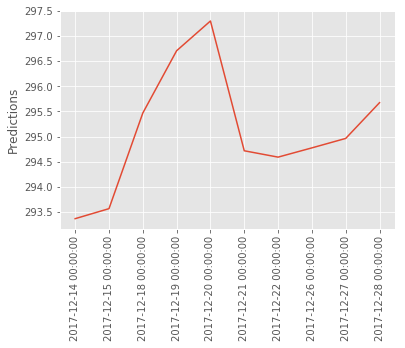

In [84]:
df =boeing_clean.copy()
pred = df.tail(10).copy()
pred['Predictions'] = predictions
ax = sns.lineplot(x=range(10), y="Predictions", data=pred)
plt.xticks(range(10), pred.index, rotation='vertical')
dates = pred.index
